Лабораторная работа №5

Выполнила студентка группы 6131-010402D Фролова Анастасия Сергеевна

1:

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.



In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt

import sklearn as sk
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
path = '...'

df = pd.read_csv(Path(path, 'loan_data.csv'))

2:

Датасет и подготовка данных, этап 1:



Привести описание датасета.


Датасет содержит записи о персональных и финансовых данных. Эти данные используются для понимания факторов финансового риска и моделирования процессов прогнозного моделирования для одобрения кредитов и кредитного скоринга.
* person_age - возраст;
* person_gender - пол;
* person_education - наивысший уровень образования;
* person_income - годовой доход;
* person_emp_exp - количество лет трудового стажа;
* person_home_ownership - статус владения жильем (аренда, собственное, ипотека);
* loan_amnt - запрашиваемая сумма кредита;
* loan_intent — цель кредита;
* loan_int_rate — процентная ставка по кредиту;
* loan_percent_income — сумма кредита в процентах от годового дохода;
* cb_person_cred_hist_length — продолжительность кредитной истории в годах;
* credit_score — кредитный рейтинг человека;
* previous_loan_defaults_on_file — индикатор предыдущих невыплат кредита;
* loan_status — статус одобрения кредита (1 = одобрено; 0 = отклонено).

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".


In [4]:
df.info()
df.isna().sum() # проверка на NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
print(df['person_gender'].unique())
print(df['person_education'].unique())
print(df['person_home_ownership'].unique())
print(df['loan_intent'].unique())
print(df['previous_loan_defaults_on_file'].unique())

['female' 'male']
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['No' 'Yes']


In [ ]:
# Заменим категориальные признаки

columns = {'person_gender': {'female': 1, 'male': 0},
           'person_education': {'Master': 0, 'High School': 1, 'Bachelor': 2, 'Associate': 3, 'Doctorate': 4},
           'person_home_ownership': {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3},
           'loan_intent': {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5},
           'previous_loan_defaults_on_file': {'No': 0, 'Yes': 1}}
df_replace = df.replace(columns)

In [7]:
print(df_replace.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Нормализовать численные данные.


In [8]:
# Выполним нормализацию, а в качестве target переменной выберем credit_score

X = df_replace.drop('credit_score', axis=1)
y = df_replace['credit_score']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, columns=X.columns)

Визуализировать heatmap-матрицу кореллированности признаков.


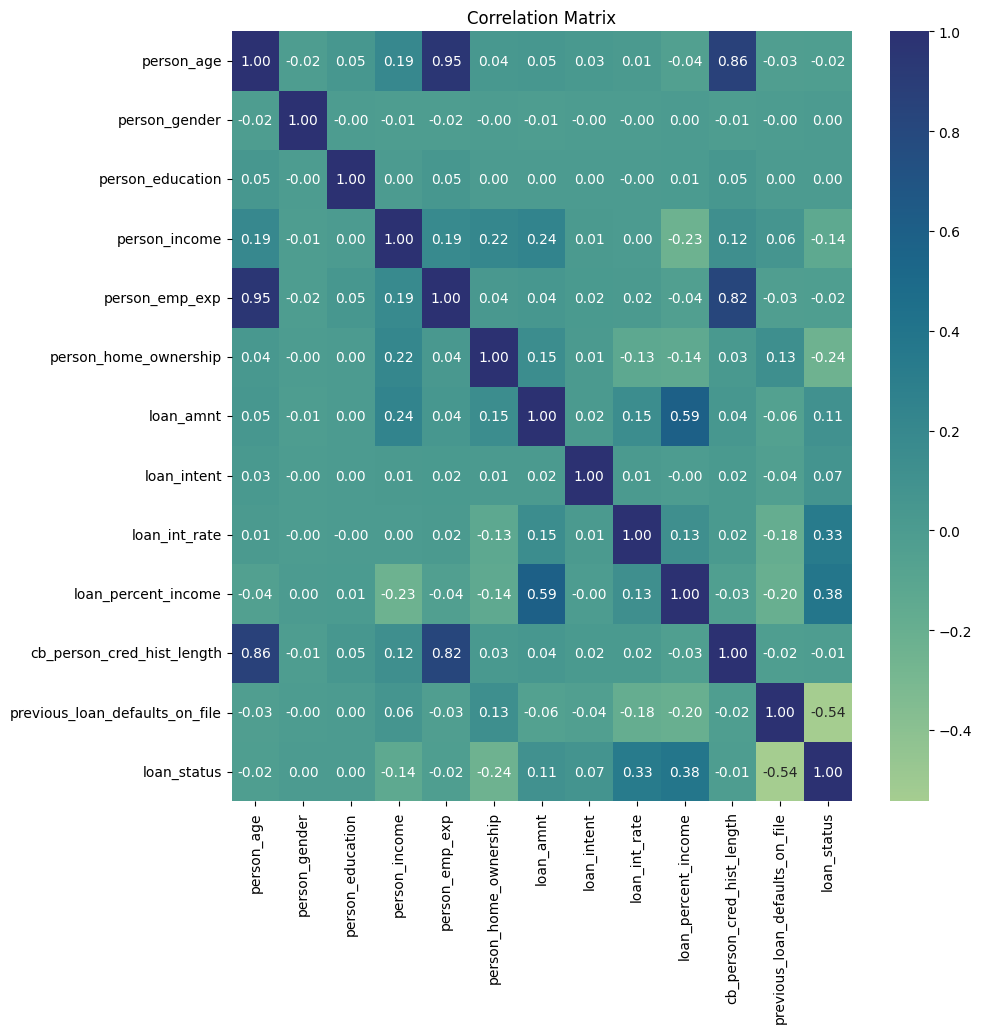

In [9]:
heat_matrix = X.corr()
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(heat_matrix, cmap='crest', annot= True, fmt='.2f', linecolor='white')
plt.show()

Визуализировать взаимосвязь между target-переменной и каждым из признаком (с использованием srs.pairplot или pandas.plotting.scatter_matrix). Лучше всего построить диаграмму попарного распределения между таргетом и каждым из признаков отдельно (пример с sns.FacetGrid в лекции).


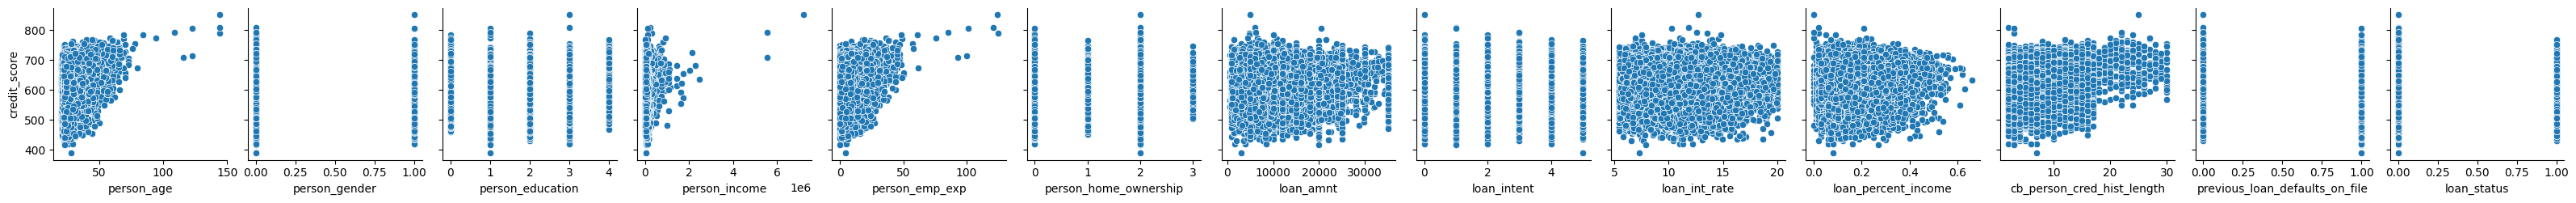

In [10]:
# Выполним визуализацию взаимосвязи между target-переменной и каждым из признаков с помощью sns.pairplot

sns.pairplot(df_replace, y_vars=['credit_score'], x_vars= X.columns, height=2.5)

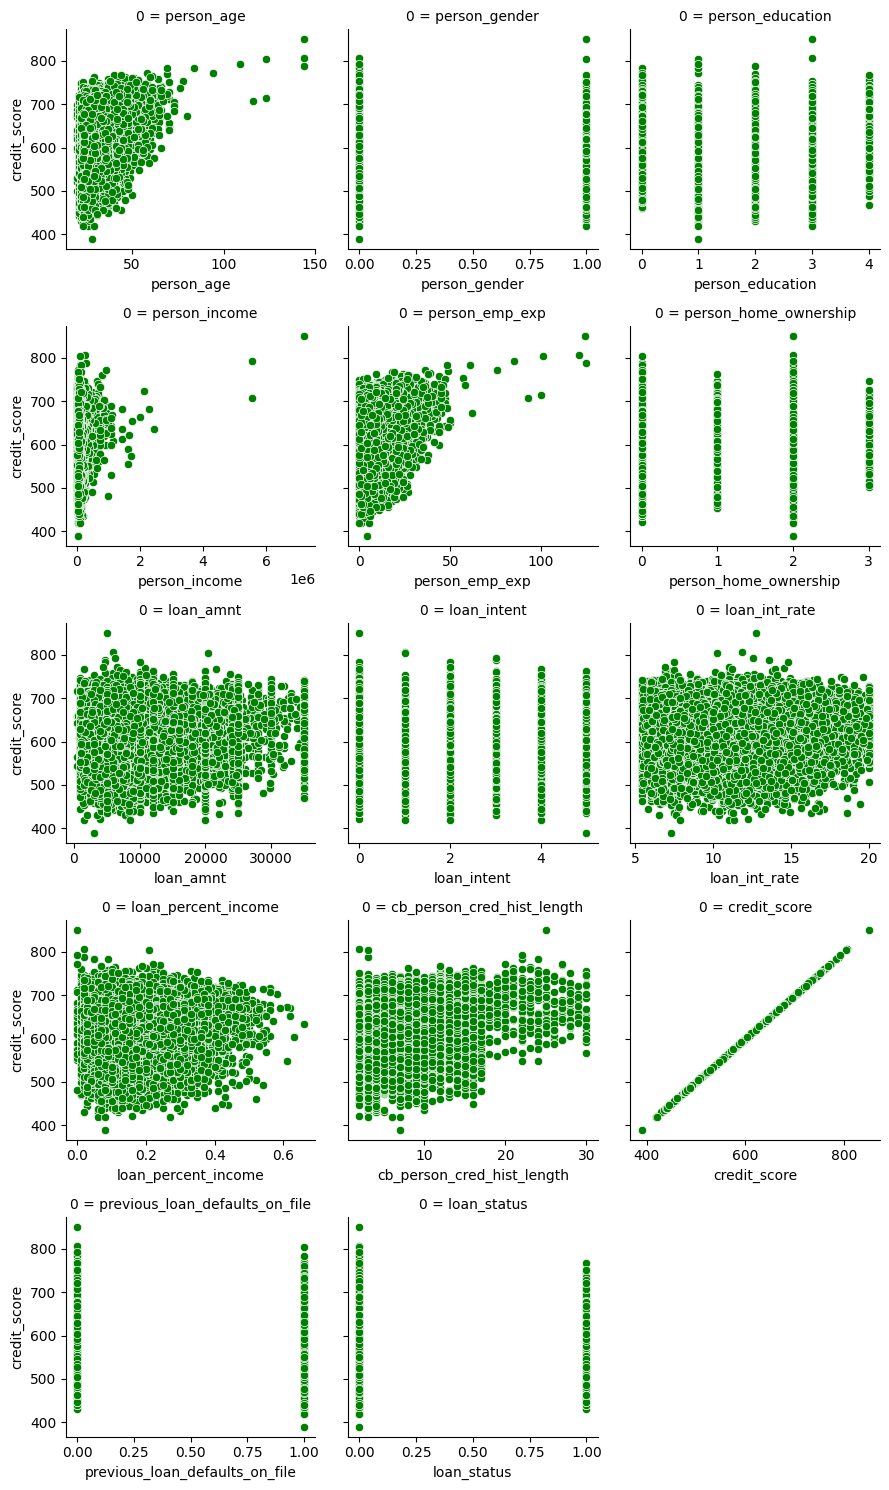

In [11]:
fig = sns.FacetGrid(pd.DataFrame(df_replace.columns), col=0, col_wrap=3, sharex=False)

for ax, varx in zip(fig.axes, df_replace.columns):
    sns.scatterplot(data=df_replace[df_replace.columns], x=varx, y='credit_score', ax=ax, color = 'green')

fig.tight_layout()

Разбить выборку на обучающую и тестовую.


In [12]:
# Временно убираем категориальные признаки

col = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
df_drop = df_replace.drop(col, axis=1, inplace=False)
df_drop.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1


In [15]:
X_drop = df_drop.drop('credit_score', axis=1)
y_drop = df_drop['credit_score']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_drop)
X_drop = pd.DataFrame(scaled_features, columns=X_drop.columns)
Y_drop = scaler.fit_transform(y_drop.values.reshape(-1,1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_drop,Y_drop, test_size= 0.3, random_state= 42)

3:

Обучить модель линейной регрессии LinearRegression.


In [16]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)
LinearRegression_model_pred = LinearRegression_model.predict(X_test)

Вывести метрики

In [ ]:
mse = mean_squared_error(y_test, LinearRegression_model_pred)
mae = mean_absolute_error(y_test, LinearRegression_model_pred)
r_2 = r2_score(y_test, LinearRegression_model_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("R2 score: ", r_2)

MSE:  0.011858885872363728
MAE:  0.08725809382329758
R2 score:  0.039529954635541764


In [18]:
LinearRegression_model.coef_

array([ 0.03841781, -0.01601687,  0.38503746,  0.00431478,  0.0061114 ,
       -0.00846386, -0.00709232, -0.00160642])

In [19]:
LinearRegression_model.intercept_

0.5083178164449446

Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).


([<matplotlib.axis.YTick at 0x2671b0e2730>,
 [Text(0, 0, 'person_income'),
  Text(0, 1, 'loan_percent_income'),
  Text(0, 2, 'cb_person_cred_hist_length'),
  Text(0, 3, 'loan_status'),
  Text(0, 4, 'loan_amnt'),
  Text(0, 5, 'loan_int_rate'),
  Text(0, 6, 'person_age'),
  Text(0, 7, 'person_emp_exp')])

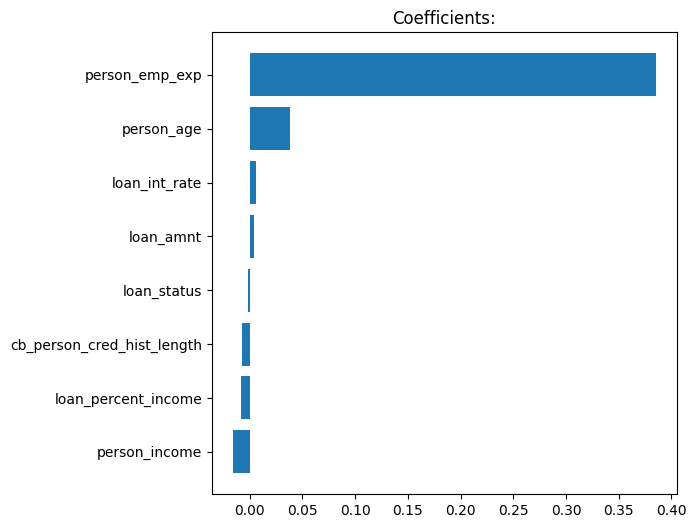

In [ ]:
coef = []
name = []
z = zip(LinearRegression_model.coef_, X_drop.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef.append(c)
    name.append(n)

plt.figure(figsize=(6,6))
plt.title('Coefficients:')
plt.barh(range(len(LinearRegression_model.coef_)), coef, align='center')
plt.yticks(range(len(LinearRegression_model.coef_)), name)

4:

Для каждого вида регрессии (Ridge, LASSO, Elastic Net):



In [21]:
# Lasso

lasso = Lasso()

parameters = {'alpha': np.arange(0.1, 1, 0.01)}
lasso_gs = GridSearchCV(lasso, parameters, n_jobs= -1, verbose = 2)
lasso_gs.fit(X_train, y_train)
print(f"Best Params for Lasso: {lasso_gs.best_params_}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Params for Lasso: {'alpha': 0.1}


In [ ]:
lasso_model = Lasso(alpha= 0.1)
lasso_model.fit(X_train, y_train)
lasso_model_pred = lasso_model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, lasso_model_pred)}, MAE: {mean_absolute_error(y_test, lasso_model_pred)}, R2: {r2_score(y_test, lasso_model_pred)}")

MSE: 0.012347056145164405, MAE: 0.08880644963832017, R2: -7.732893361867e-06


In [24]:
lasso_model.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.])

In [25]:
lasso_model.intercept_

0.5275030365769496

([<matplotlib.axis.YTick at 0x2671aeeba00>,
 [Text(0, 0, 'person_age'),
  Text(0, 1, 'person_income'),
  Text(0, 2, 'person_emp_exp'),
  Text(0, 3, 'loan_amnt'),
  Text(0, 4, 'loan_int_rate'),
  Text(0, 5, 'loan_percent_income'),
  Text(0, 6, 'cb_person_cred_hist_length'),
  Text(0, 7, 'loan_status')])

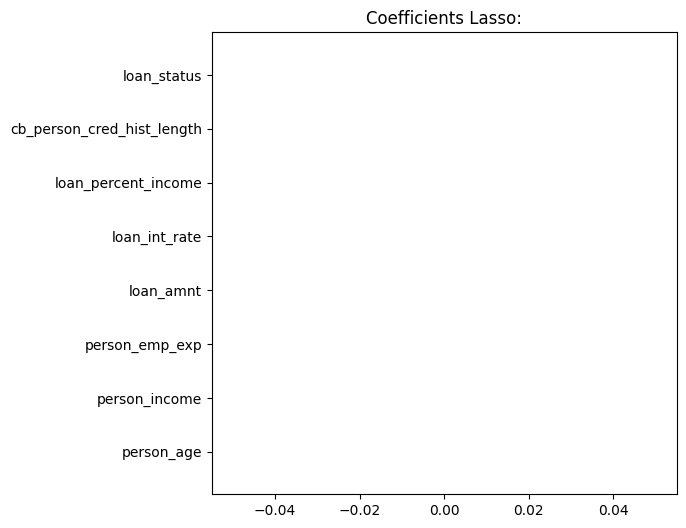

In [ ]:
coef_lasso = []
name_lasso = []
z = zip(lasso_model.coef_, X_drop.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_lasso.append(c)
    name_lasso.append(n)

plt.figure(figsize=(6,6))
plt.title('Coefficients Lasso:')
plt.barh(range(len(lasso_model.coef_)), coef_lasso, align='center')
plt.yticks(range(len(lasso_model.coef_)), name_lasso)

In [27]:
# Ridge

ridge = Ridge()

parameters = {'alpha': np.arange(0.1, 1, 0.01)}
ridge_gs = GridSearchCV(ridge, parameters, n_jobs= -1, verbose = 2)
ridge_gs.fit(X_train, y_train)
print(f"Best Params for Ridge: {ridge_gs.best_params_}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Params for Ridge: {'alpha': 0.8099999999999996}


In [ ]:
ridge_model = Ridge(alpha= 0.8099999999999996)
ridge_model.fit(X_train, y_train)
ridge_model_pred = ridge_model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, ridge_model_pred)}, MAE: {mean_absolute_error(y_test, ridge_model_pred)}, R2: {r2_score(y_test, ridge_model_pred)}")

MSE: 0.01185986318731205, MAE: 0.08726516306069433, R2: 0.03945080034205639


In [30]:
ridge_model.coef_

array([ 0.06814218, -0.01081104,  0.34986816,  0.00406335,  0.00616036,
       -0.00812476, -0.00599638, -0.00162197])

In [31]:
ridge_model.intercept_

0.5077519662124971

([<matplotlib.axis.YTick at 0x2671b035190>,
 [Text(0, 0, 'person_income'),
  Text(0, 1, 'loan_percent_income'),
  Text(0, 2, 'cb_person_cred_hist_length'),
  Text(0, 3, 'loan_status'),
  Text(0, 4, 'loan_amnt'),
  Text(0, 5, 'loan_int_rate'),
  Text(0, 6, 'person_age'),
  Text(0, 7, 'person_emp_exp')])

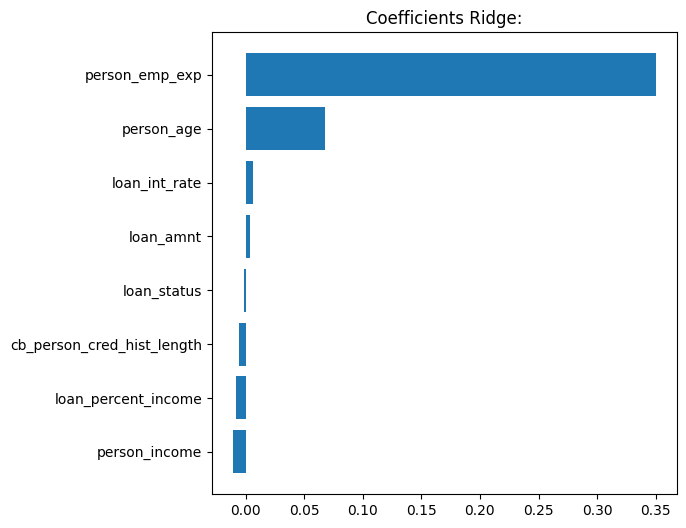

In [ ]:
coef_ridge = []
name_ridge = []
z = zip(ridge_model.coef_, X_drop.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_ridge.append(c)
    name_ridge.append(n)

plt.figure(figsize=(6,6))
plt.title('Coefficients Ridge:')
plt.barh(range(len(ridge_model.coef_)), coef_ridge, align='center')
plt.yticks(range(len(ridge_model.coef_)), name_ridge)

In [34]:
# Elastic Net

elastic = ElasticNet()

parameters = {'alpha': np.arange(0.1, 1, 0.1),
              'l1_ratio': np.arange(0.05, 0.5, 0.05)}
elastic_gs = GridSearchCV(elastic, parameters, n_jobs= -1, verbose = 2)
elastic_gs.fit(X_train, y_train)
print(f"Best Params for ElasticNet: {elastic_gs.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Params for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.05}


In [ ]:
elastic_model = ElasticNet(alpha= 0.1, l1_ratio= 0.05)
elastic_model.fit(X_train, y_train)
elastic_model_pred = elastic_model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, elastic_model_pred)}, MAE: {mean_absolute_error(y_test, elastic_model_pred)}, R2: {r2_score(y_test, elastic_model_pred)}")

MSE: 0.012347056145164405, MAE: 0.08880644963832017, R2: -7.732893361867e-06


In [36]:
elastic_model.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.])

In [37]:
elastic_model.intercept_

0.5275030365769496

([<matplotlib.axis.YTick at 0x2671ddcfac0>,
 [Text(0, 0, 'person_age'),
  Text(0, 1, 'person_income'),
  Text(0, 2, 'person_emp_exp'),
  Text(0, 3, 'loan_amnt'),
  Text(0, 4, 'loan_int_rate'),
  Text(0, 5, 'loan_percent_income'),
  Text(0, 6, 'cb_person_cred_hist_length'),
  Text(0, 7, 'loan_status')])

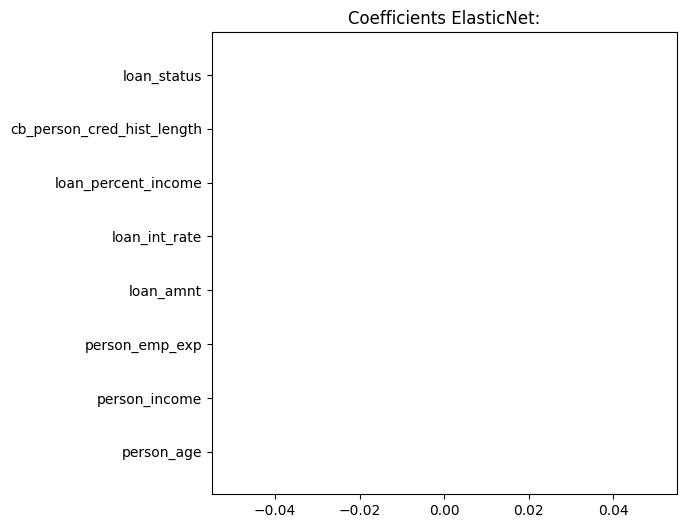

In [ ]:
coef_elastic = []
name_elastic = []
z = zip(elastic_model.coef_, X_drop.columns)
z = sorted(z, key=lambda x: x[0])
for c, n in z:
    coef_elastic.append(c)
    name_elastic.append(n)

plt.figure(figsize=(6,6))
plt.title('Coefficients ElasticNet:')
plt.barh(range(len(elastic_model.coef_)), coef_elastic, align='center')
plt.yticks(range(len(elastic_model.coef_)), name_elastic)

Запомнить лучшие модели для 2 этапа.



In [43]:
# Запомним лучшие модели

best_linear = LinearRegression()
best_lasso = Lasso(alpha= 0.1)
best_ridge = Ridge(alpha= 0.8099999999999996)
best_elastic = ElasticNet(alpha= 0.1, l1_ratio= 0.05)

5:

Датасет и подготовка данных, этап 2:



In [40]:
df_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [41]:
df_replace.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,0,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,1,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,1,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,0,0,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1


Обучить LinearRegression, лучшие модели Ridge, LASSO, Elastic Net на обучающем наборе с категориальными признаками.


In [42]:
X_replace = df_replace.drop('credit_score', axis=1)
y_replace = df_replace['credit_score']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_replace)
X_replace = pd.DataFrame(scaled_features, columns=X_replace.columns)
Y_replace = scaler.fit_transform(y_replace.values.reshape(-1,1)).flatten()

X_train_rep, X_test_rep, y_train_rep, y_test_rep = train_test_split(X_replace,Y_replace, test_size= 0.3, random_state= 42)

In [44]:
best_linear.fit(X_train_rep, y_train_rep)

best_ridge.fit(X_train_rep, y_train_rep)
best_lasso.fit(X_train_rep, y_train_rep)
best_elastic.fit(X_train_rep, y_train_rep)

ElasticNet(alpha=0.1, l1_ratio=0.05)

In [49]:
model_pred = best_linear.predict(X_test_rep)
print(f"LinearRegression:")
print(f"MSE: {mean_squared_error(y_test_rep, model_pred)}, MAE: {mean_absolute_error(y_test_rep, model_pred)}, R2: {r2_score(y_test_rep, model_pred)}")
print(f"Coef_: {best_linear.coef_}, Intercept_: {best_linear.intercept_}")

model_pred = best_ridge.predict(X_test_rep)
print(f"Ridge:")
print(f"MSE: {mean_squared_error(y_test_rep, model_pred)}, MAE: {mean_absolute_error(y_test_rep, model_pred)}, R2: {r2_score(y_test_rep, model_pred)}")
print(f"Coef_: {best_ridge.coef_}, Intercept_: {best_ridge.intercept_}")

model_pred = best_lasso.predict(X_test_rep)
print(f"Lasso:")
print(f"MSE: {mean_squared_error(y_test_rep, model_pred)}, MAE: {mean_absolute_error(y_test_rep, model_pred)}, R2: {r2_score(y_test_rep, model_pred)}")
print(f"Coef_: {best_lasso.coef_}, Intercept_: {best_lasso.intercept_}")

model_pred = best_elastic.predict(X_test_rep)
print(f"ElasticNet:")
print(f"MSE: {mean_squared_error(y_test_rep, model_pred)}, MAE: {mean_absolute_error(y_test_rep, model_pred)}, R2: {r2_score(y_test_rep, model_pred)}")
print(f"Coef_: {best_elastic.coef_}, Intercept_: {best_elastic.intercept_}")

LinearRegression:
MSE: 0.011300455796063006, MAE: 0.08506888282580005, R2: 0.0847580954988727
Coef_: [ 0.04613463  0.00059678 -0.00727858 -0.02456633  0.35059161 -0.00038867
  0.00435267  0.0006567   0.00597413 -0.00722447 -0.00484821 -0.05610436
 -0.03855058], Intercept_: 0.548251392462823
Ridge:
MSE: 0.011301489341377468, MAE: 0.08507861679587991, R2: 0.0846743870185187
Coef_: [ 0.07173307  0.00060073 -0.00728357 -0.0178473   0.31951953 -0.00038047
  0.00406067  0.00063494  0.00601481 -0.00683507 -0.00369814 -0.05611915
 -0.03856564], Intercept_: 0.5477626733947573
Lasso:
MSE: 0.012347056145164405, MAE: 0.08880644963832017, R2: -7.732893361867e-06
Coef_: [ 0.  0. -0.  0.  0.  0.  0.  0.  0. -0.  0. -0. -0.], Intercept_: 0.5275030365769496
ElasticNet:
MSE: 0.01210770750670185, MAE: 0.08793404123561477, R2: 0.01937749436291758
Coef_: [ 0.          0.         -0.          0.          0.          0.
  0.          0.          0.         -0.          0.         -0.01459616
 -0.        ], I

Сравнить метрики с наличием категориальных признаков и без для каждой из моделей.


Выбрать лучшую модель.


In [ ]:
# Без категориальных признаков:
# LinearRegr: MSE:  0.011858885872363728, MAE:  0.08725809382329758, R2 score:  0.039529954635541764
# Lasso: MSE: 0.012347056145164405, MAE: 0.08880644963832017, R2: -7.732893361867e-06
# Ridge: MSE: 0.01185986318731205, MAE: 0.08726516306069433, R2: 0.03945080034205639
# ElasticNet: MSE: 0.012347056145164405, MAE: 0.08880644963832017, R2: -7.732893361867e-06

# Цель уменьшить ошибку и увеличить R2
# Видим, что категориальные признаки оказывают мало влияния, а изменения минимальны
# Выберем в качестве лучшей модели то, что более или менее нам подходит: LinearRegression с категориальными признаками

Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).


([<matplotlib.axis.YTick at 0x2671ff26970>,
 [Text(0, 0, 'previous_loan_defaults_on_file'),
  Text(0, 1, 'loan_status'),
  Text(0, 2, 'person_income'),
  Text(0, 3, 'person_education'),
  Text(0, 4, 'loan_percent_income'),
  Text(0, 5, 'cb_person_cred_hist_length'),
  Text(0, 6, 'person_home_ownership'),
  Text(0, 7, 'person_gender'),
  Text(0, 8, 'loan_intent'),
  Text(0, 9, 'loan_amnt'),
  Text(0, 10, 'loan_int_rate'),
  Text(0, 11, 'person_age'),
  Text(0, 12, 'person_emp_exp')])

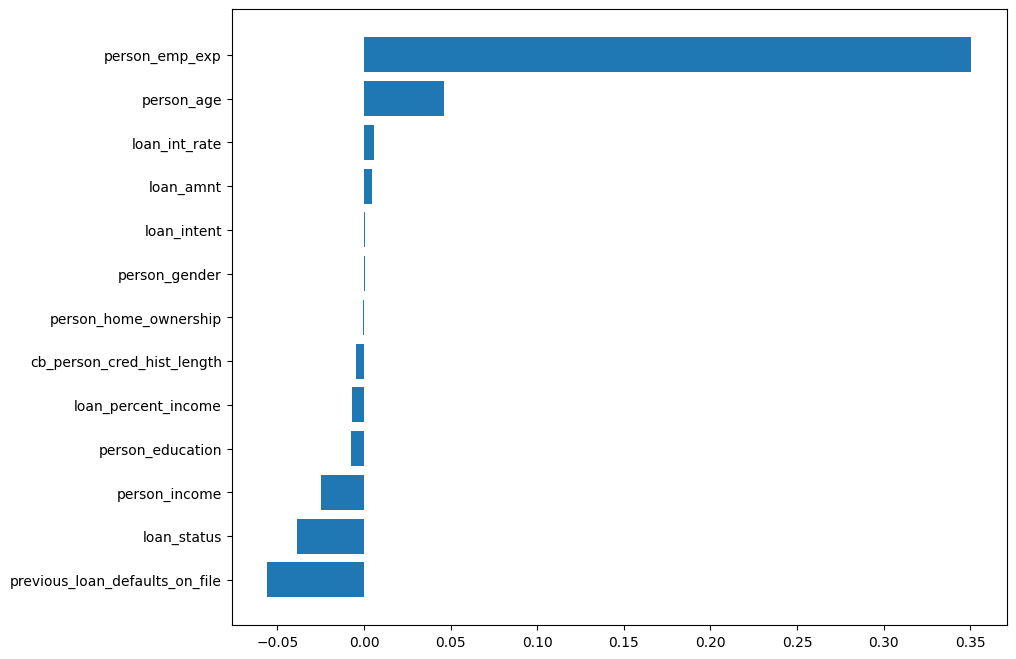

In [48]:
coefs_best = []
names_best = []
zz_best = zip(best_linear.coef_, X_replace.columns)
zz_best = sorted(zz_best, key=lambda x: x[0])
for c, n in zz_best:
    coefs_best.append(c)
    names_best.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(best_linear.coef_)), coefs_best, align='center')
plt.yticks(range(len(best_linear.coef_)), names_best)

Осуществить фильтрацию признаков с использованием Recursive Feature Elimination.


In [58]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
model = LinearRegression()

rf_pipeline = Pipeline(steps=[('rfe', rfe), ('model', model)])
rf_pipeline.fit(X_train_rep, y_train_rep)

y_pred = rf_pipeline.predict(X_test_rep)

max_len = 36
print(f"Выбранные признаки:\n{rf_pipeline.named_steps['rfe'].get_feature_names_out()}")
# Коэффициенты регрессии
print(f"Коэффициенты регрессии:\n{model.coef_}")
# MSE
print(f"{'Средняя квадратичная ошибка (MSE):':<{max_len}} {mean_squared_error(y_test_rep, y_pred):.3f}")
# MAE
print(f"{'Средняя абсолютная ошибка (MAE):':<{max_len}} {mean_absolute_error(y_test_rep, y_pred):.3f}")
# R2 score
print(f"{'Коэффициент детерминации (R2 score):':<{max_len}} {r2_score(y_test_rep, y_pred):.3f}")

Выбранные признаки:
['person_age' 'person_education' 'person_emp_exp'
 'previous_loan_defaults_on_file' 'loan_status']
Коэффициенты регрессии:
[ 0.0354258  -0.00733319  0.35010423 -0.05612024 -0.03806558]
Средняя квадратичная ошибка (MSE):   0.011
Средняя абсолютная ошибка (MAE):     0.085
Коэффициент детерминации (R2 score): 0.085


Построить график (barh) с важностью коэфициентов при соответствующих признаках (сверху вниз расположены коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).


([<matplotlib.axis.YTick at 0x26720320b50>,
 [Text(0, 0, 'person_income'),
  Text(0, 1, 'person_emp_exp'),
  Text(0, 2, 'person_gender'),
  Text(0, 3, 'person_age'),
  Text(0, 4, 'person_education')])

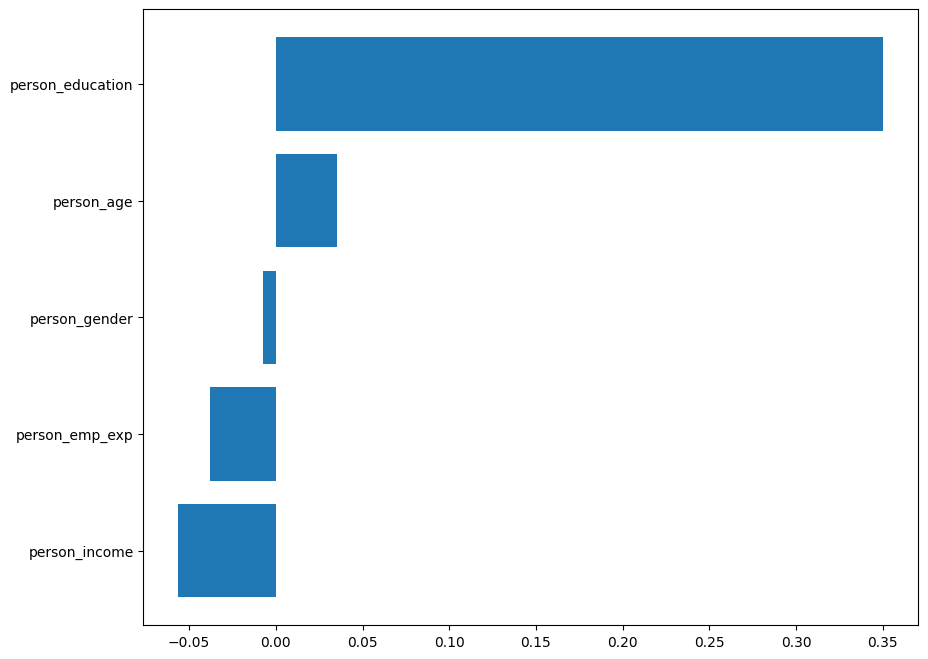

In [59]:
coefs_best_rfe = []
names_best_rfe = []
zz_best = zip(model.coef_, X_replace.columns)
zz_best = sorted(zz_best, key=lambda x: x[0])
for c, n in zz_best:
    coefs_best_rfe.append(c)
    names_best_rfe.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(model.coef_)), coefs_best_rfe, align='center')
plt.yticks(range(len(model.coef_)), names_best_rfe)

7:

Сделать вывод:



Лучший без категориальных - Линейная регрессия

Лучший с категориальными - Линейная регрессия

Все метрики стали хуже